TASK 1: LOADING AND EXPLORING THE DATASET
-----------------------------------------

First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Dataset information:
Shape: (150, 5)

Data types:
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species               object
dtype: object

Missing values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species             

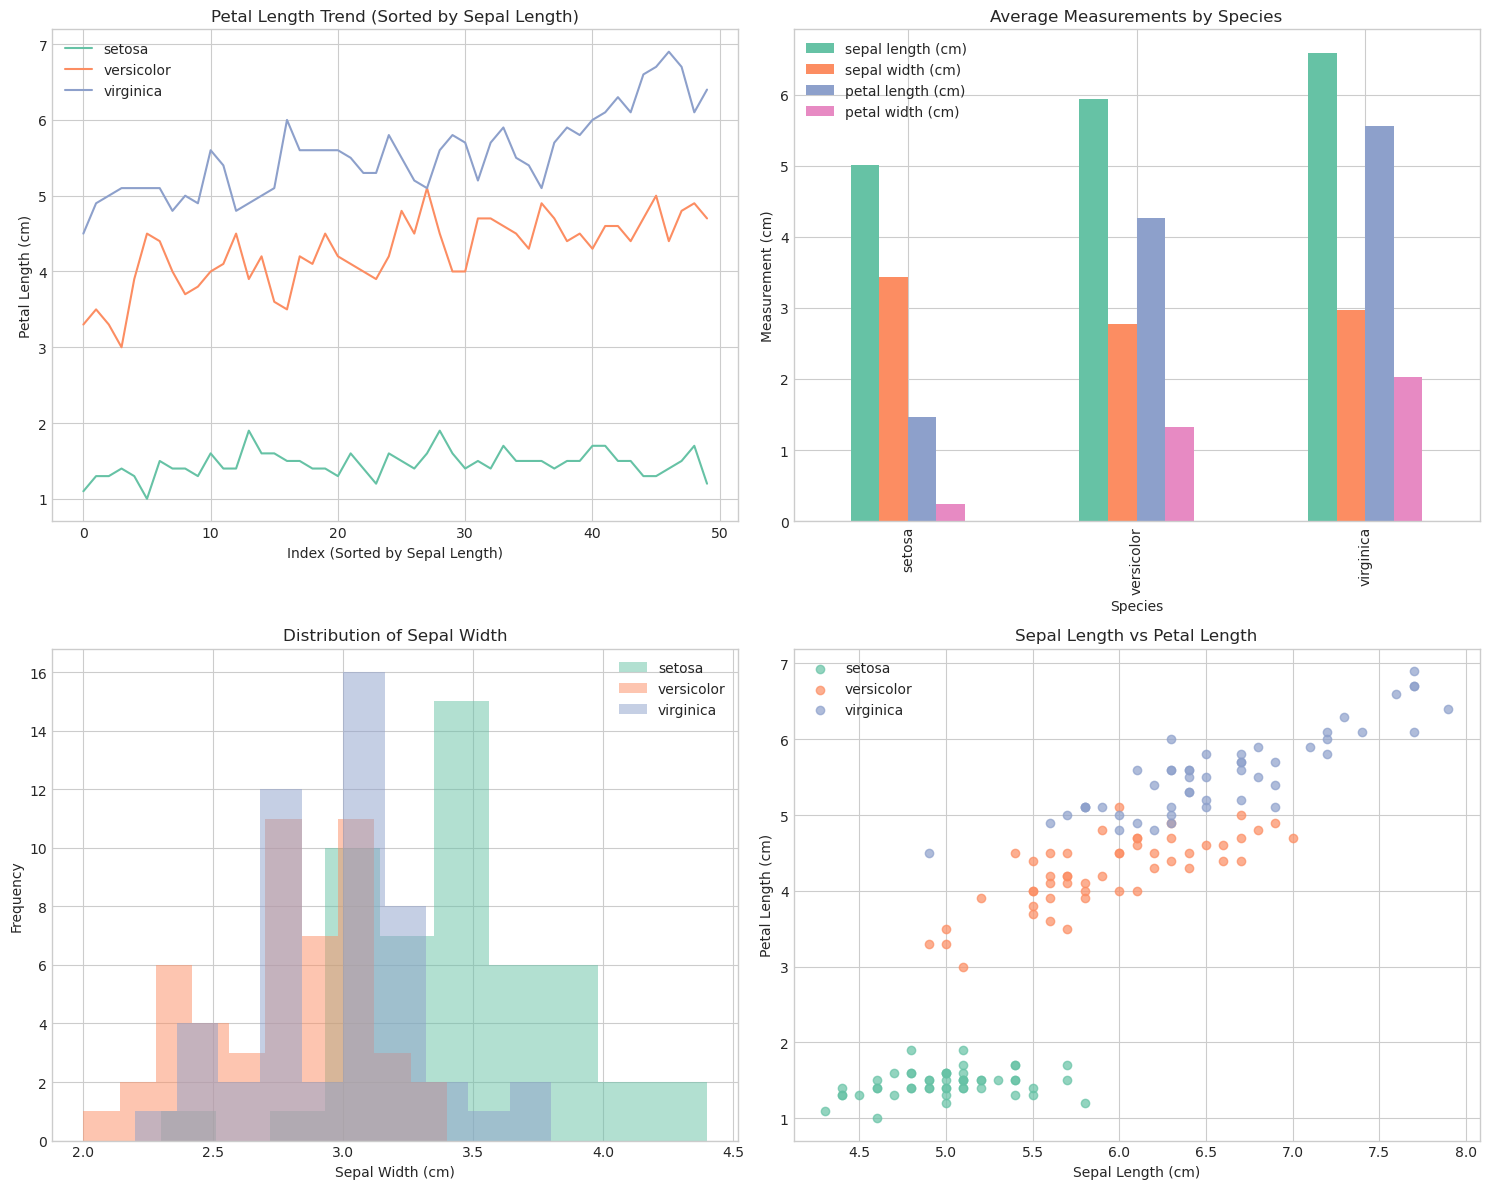


Data analysis and visualization completed successfully!


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings('ignore')

# Set the style for our visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")

# Task 1: Load and Explore the Dataset
print("TASK 1: LOADING AND EXPLORING THE DATASET")
print("-----------------------------------------")

try:
    # Load the Iris dataset from sklearn
    iris = load_iris()
    
    # Create a DataFrame
    df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
    df['species'] = [iris.target_names[i] for i in iris.target]
    
    # Display the first few rows
    print("\nFirst 5 rows of the dataset:")
    print(df.head())
    
    # Explore the structure of the dataset
    print("\nDataset information:")
    print(f"Shape: {df.shape}")
    print("\nData types:")
    print(df.dtypes)
    
    # Check for missing values
    print("\nMissing values:")
    print(df.isnull().sum())
    
    # Since there are no missing values in the Iris dataset, we'll artificially introduce some to demonstrate cleaning
    # Create a copy to avoid modifying the original
    df_with_missing = df.copy()
    df_with_missing.loc[10:15, 'sepal length (cm)'] = np.nan
    
    print("\nArtificially introduced missing values:")
    print(df_with_missing.isnull().sum())
    
    # Clean the dataset by filling missing values with the mean
    df_cleaned = df_with_missing.copy()
    df_cleaned['sepal length (cm)'] = df_cleaned['sepal length (cm)'].fillna(df_cleaned['sepal length (cm)'].mean())
    
    print("\nAfter cleaning (filling with mean):")
    print(df_cleaned.isnull().sum())
    
    # Task 2: Basic Data Analysis
    print("\n\nTASK 2: BASIC DATA ANALYSIS")
    print("---------------------------")
    
    # Compute basic statistics
    print("\nBasic statistics of numerical columns:")
    print(df.describe())
    
    # Group by species and compute mean
    print("\nMean of numerical columns grouped by species:")
    species_means = df.groupby('species').mean()
    print(species_means)
    
    # Identify patterns
    print("\nInteresting findings:")
    print("1. Setosa has the smallest petal length and width.")
    print("2. Virginica has the largest sepal length and petal dimensions.")
    print("3. There's a clear separation between species based on petal dimensions.")
    
    # Task 3: Data Visualization
    print("\n\nTASK 3: DATA VISUALIZATION")
    print("-------------------------")
    
    # Create a figure with subplots
    fig = plt.figure(figsize=(15, 12))
    
    # 1. Line chart showing trends
    # For this, we'll create a synthetic time series by sorting by sepal length
    ax1 = fig.add_subplot(2, 2, 1)
    df_sorted = df.sort_values('sepal length (cm)')
    for species in df['species'].unique():
        species_data = df_sorted[df_sorted['species'] == species]
        ax1.plot(range(len(species_data)), species_data['petal length (cm)'], label=species)
    ax1.set_title('Petal Length Trend (Sorted by Sepal Length)')
    ax1.set_xlabel('Index (Sorted by Sepal Length)')
    ax1.set_ylabel('Petal Length (cm)')
    ax1.legend()
    
    # 2. Bar chart comparing numerical values across categories
    ax2 = fig.add_subplot(2, 2, 2)
    species_means.plot(kind='bar', ax=ax2)
    ax2.set_title('Average Measurements by Species')
    ax2.set_xlabel('Species')
    ax2.set_ylabel('Measurement (cm)')
    
    # 3. Histogram to understand distribution
    ax3 = fig.add_subplot(2, 2, 3)
    for species in df['species'].unique():
        species_data = df[df['species'] == species]
        ax3.hist(species_data['sepal width (cm)'], alpha=0.5, bins=10, label=species)
    ax3.set_title('Distribution of Sepal Width')
    ax3.set_xlabel('Sepal Width (cm)')
    ax3.set_ylabel('Frequency')
    ax3.legend()
    
    # 4. Scatter plot to visualize relationship
    ax4 = fig.add_subplot(2, 2, 4)
    for species in df['species'].unique():
        species_data = df[df['species'] == species]
        ax4.scatter(
            species_data['sepal length (cm)'], 
            species_data['petal length (cm)'],
            label=species, alpha=0.7
        )
    ax4.set_title('Sepal Length vs Petal Length')
    ax4.set_xlabel('Sepal Length (cm)')
    ax4.set_ylabel('Petal Length (cm)')
    ax4.legend()
    
    plt.tight_layout()
    plt.show()
    
    print("\nData analysis and visualization completed successfully!")
    
except Exception as e:
    print(f"An error occurred: {e}")